<a href="https://colab.research.google.com/github/yadsan/aiml1/blob/main/complete_of_Assignment3_Cannibal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>The Problem Statement</b>:

Implement a basic state space search (BFS) program in Python to solve the classic "Missionaries and Cannibals" puzzle. The goal is to implement a simple program that finds a sequence of valid moves to safely transport three missionaries and three cannibals across a river, following specific constraints.






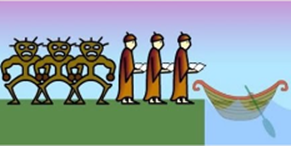

## The Code

### Imports Needed

In [ ]:
from collections import deque

### Define the goal state

In [ ]:
GOAL_STATE = (0, 0, 1)

### Check if a state is valid

In [3]:
# Check if a state is valid
def is_valid_state(state):
    missionaries, cannibals, boat = state
    # Check if numbers are in bounds
    if missionaries < 0 or missionaries > 3 or cannibals < 0 or cannibals > 3 or boat not in [0, 1]:
        return False
    # Check if cannibals outnumber missionaries
    if missionaries > 0 and missionaries < cannibals:
        return False
    if missionaries < 3 and (3 - missionaries) < (3 - cannibals):
        return False
    return True

### Generate possible next states

In [4]:
# Generate possible next states
def generate_next_states(state):
    missionaries, cannibals, boat = state
    if boat == 1:  # Boat is on the left side
        possible_moves = [(2, 0, 1), (0, 2, 1), (1, 1, 1), (1, 0, 1), (0, 1, 1)]
    else:  # Boat is on the right side
        possible_moves = [(2, 0, -1), (0, 2, -1), (1, 1, -1), (1, 0, -1), (0, 1, -1)]
    next_states = [(missionaries - move[0]*boat, cannibals - move[1]*boat, boat - move[2]) for move in possible_moves]
    return [state for state in next_states if is_valid_state(state)]

### Breadth-First Search function

In [5]:
# Breadth-First Search function
def bfs(initial_state):
    queue = deque([initial_state])
    visited = set()
    while queue:
        state = queue.popleft()
        if state == (0, 0, 0):  # Goal state
            return state
        if state in visited:
            continue
        visited.add(state)
        queue.extend(generate_next_states(state))
    return None  # No solution found

### Solve the puzzle

In [9]:
from collections import deque

# Check if a state is valid
def is_valid_state(state):
    missionaries, cannibals, boat = state
    # Check if numbers are in bounds
    if missionaries < 0 or missionaries > 3 or cannibals < 0 or cannibals > 3 or boat not in [0, 1]:
        return False
    # Check if cannibals outnumber missionaries
    if missionaries > 0 and missionaries < cannibals:
        return False
    if missionaries < 3 and (3 - missionaries) < (3 - cannibals):
        return False
    return True

# Generate possible next states
def generate_next_states(state):
    missionaries, cannibals, boat = state
    if boat == 1:  # Boat is on the left side
        possible_moves = [(2, 0, 1), (0, 2, 1), (1, 1, 1), (1, 0, 1), (0, 1, 1)]
    else:  # Boat is on the right side
        possible_moves = [(2, 0, -1), (0, 2, -1), (1, 1, -1), (1, 0, -1), (0, 1, -1)]
    next_states = [(missionaries - move[0]*boat, cannibals - move[1]*boat, boat - move[2]) for move in possible_moves]
    return [state for state in next_states if is_valid_state(state)]

# Breadth-First Search function
def bfs(initial_state):
    queue = deque([(initial_state, [initial_state])])
    visited = set()
    while queue:
        state, path = queue.popleft()
        if state == (0, 0, 0):  # Goal state
            return path
        if state in visited:
            continue
        visited.add(state)
        for next_state in generate_next_states(state):
            if next_state not in visited:
                queue.append((next_state, path + [next_state]))
    return None  # No solution found


# Solve the puzzle
initial_state = (3, 3, 1)
solution_path = bfs(initial_state)

if solution_path:
    print("Solution Path:")
    for state in solution_path:
        print(state)
else:
    print("No solution found.")


Solution Path:
(3, 3, 1)
(3, 1, 0)
(3, 1, 1)
(1, 1, 0)
(1, 1, 1)
(0, 0, 0)
